In [6]:
import wfdb
import matplotlib.pyplot as plt
# 显示所有的标注格式
wfdb.show_ann_classes()

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False


record frequency：360
signal shape: (1000, 2)


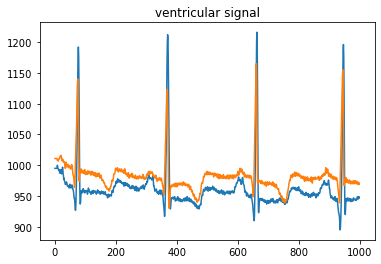

In [7]:
# 读取一条记录的心电数据前10000个数据点
record = wfdb.rdrecord('/Users/jinyanwei/Desktop/BP_Model/PhysioNet/mit_bih_arrhythmia_database_1.0.0/100', sampfrom=0, sampto=10000, physical=False, channels=[0, 1])
print("record frequency：" + str(record.fs))
# 读取前1000数据
ventricular_signal = record.d_signal[0:1000]
print('signal shape: ' + str(ventricular_signal.shape))
# 绘制波形
plt.plot(ventricular_signal)
plt.title("ventricular signal")
plt.show()

In [8]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [10]:
# 读取第100条记录的annatation，前1000个点
signal_annotation = wfdb.rdann("/Users/jinyanwei/Desktop/BP_Model/PhysioNet/mit_bih_arrhythmia_database_1.0.0/100", "atr", sampfrom=0, sampto=1000)
# 打印标注信息
print("chan: " + str(signal_annotation.chan))
print("sample: " + str(signal_annotation.sample))
print("symbol: " + str(signal_annotation.symbol))
print("aux_note: " + str(signal_annotation.aux_note))


chan: [0 0 0 0 0]
sample: [ 18  77 370 662 946]
symbol: ['+', 'N', 'N', 'N', 'N']
aux_note: ['(N\x00', '', '', '', '']


record frequency：360
signal shape: (1000, 1)
[ 18  77 370 662 946]


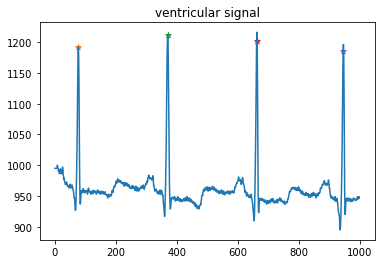

In [18]:
import wfdb
import matplotlib.pyplot as plt
 
# 读取本地的100号记录，从0到25000，通道0
record = wfdb.rdrecord('/Users/jinyanwei/Desktop/BP_Model/PhysioNet/mit_bih_arrhythmia_database_1.0.0/100', sampfrom=0, sampto=25000, physical=False, channels=[0, ])
print("record frequency：" + str(record.fs))
# 读取前1000数据
ventricular_signal = record.d_signal[0:1000]
print('signal shape: ' + str(ventricular_signal.shape))
# 绘制波形
plt.plot(ventricular_signal)
plt.title("ventricular signal")
 
# 读取annatations
signal_annotation = wfdb.rdann("/Users/jinyanwei/Desktop/BP_Model/PhysioNet/mit_bih_arrhythmia_database_1.0.0/100", "atr", sampfrom=0, sampto=1000)
print(signal_annotation.sample)
# 将读取到的annatations的心拍绘制到心电图上
for index in signal_annotation.sample:
    plt.scatter(index, ventricular_signal[index], marker="*")
plt.show()